# Prevención de Fraude

En el presente notebook se estudian los patrones de fraude de una entidad financiera.

# Cargue y lectura de información

Se importan las principales librerías a utilizar y realiza la lectura de los datos asociados a los casos de fraudes

In [1]:
## Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import plotly.express as px
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Lectura de datos

In [2]:
## Se realiza la lectura de los datos
df = pd.read_excel("../data/dataset_fraud.xlsx")
df.head(5)

,normalized_cols1,normalized_cols2,normalized_cols3,normalized_cols4,normalized_cols5,normalized_cols6,normalized_cols7,normalized_cols8,normalized_cols9,normalized_cols10,...,normalized_col_trx94,normalized_col_trx95,normalized_col_trx96,normalized_col_trx97,normalized_col_trx98,normalized_col_trx99,normalized_col_trx100,fecha_transaction,TransactionValue_PSE,target_fraud
0,4.260749,2.660147,2.460465,2.460498,8.276492,5.102737,2.013319,4.396270,3.558149,0.384329,...,0.324224,0.311423,0.465228,0.092264,0.004814,0.351203,0.005342,2022-08-31,112150.352113,0
1,5.776803,4.019913,2.437745,1.549820,2.792993,3.821706,2.996645,7.717238,4.649205,1.400718,...,0.266216,0.469309,0.979588,0.020311,0.135061,0.016091,0.114499,2023-11-30,44763.427911,0
2,2.010545,3.532498,0.728137,0.765345,1.603022,2.502707,5.406203,2.614101,2.924327,2.351548,...,0.572112,0.995458,0.469857,0.009225,0.998644,0.898577,0.994225,2023-05-31,26582.011424,0
3,1.828847,5.063110,3.200834,5.049981,1.689635,4.480551,0.578145,3.078542,4.689393,0.552295,...,0.297175,0.111453,0.657292,0.628749,0.318023,0.058134,0.634091,2023-06-30,91252.124668,0
4,3.780991,0.920376,1.920293,6.089123,0.634668,4.588525,0.293398,8.821986,1.882379,3.981640,...,0.987284,0.038650,0.011471,0.117243,0.598601,0.210163,0.024305,2022-04-30,39541.394176,0


In [3]:
## Información del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 203 entries, normalized_cols1 to target_fraud
dtypes: datetime64[ns](1), float64(201), int64(1)
memory usage: 7.7 MB


In [4]:
# Dimensiones del dataset
print(df.shape)

(5000, 203)


# Análisis Descriptivo y Análisis Exploratorio de Datos (EDA)

En este apartado se estudian los datos para entender los patrones y casos de fraude que de han evidenciado

## Análisis Univariado

In [5]:
import plotly.express as px
fig = px.histogram(df.TransactionValue_PSE,marginal="box")
fig.show()

Se puede observar que la mayoría de transacciones por pse en la plataforma tienen valores por debajo de los 144K, pero hay algunas transacciones con valores más altas, que se comportan diferente al resto de transacciones y que podrían ser indicativas de fraude.

Text(0.5, 1.0, 'Cantidad de casos de fraude y no fraude')

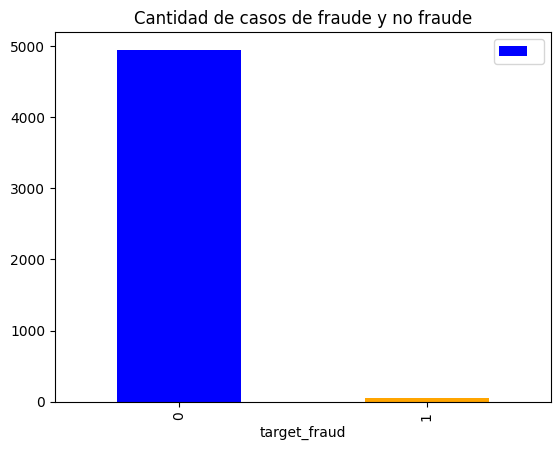

In [6]:
# Cantidad de casos de fraudes y no fraudes
df.groupby('target_fraud').size().plot(kind='bar', color=['blue', 'orange'],legend=True)
plt.title('Cantidad de casos de fraude y no fraude')

In [7]:
# Cantidad de casos de fraudes y no fraudes empleando
fig = px.histogram(df, x='target_fraud', color='target_fraud', title='Cantidad de casos de fraude y no fraude', labels={'target_fraud': 'Fraude (1) / No Fraude (0)', 'count': 'Cantidad de Casos'})
fig.update_layout(bargap=0.5)
fig.show()

In [8]:
df.target_fraud.value_counts(normalize=True)

target_fraud
0    0.99
1    0.01
Name: proportion, dtype: float64

In [9]:
# Cantidad de transacciones por fecha
df_tendencia = df.groupby('fecha_transaction', as_index=False)['TransactionValue_PSE'].count()
df_tendencia['cantidad_transacciones'] = df_tendencia['TransactionValue_PSE']
ax1 = px.line(df_tendencia, x="fecha_transaction", y="cantidad_transacciones",title='Cantidad de transacciones por fecha',
             labels={'cantidad_transacciones':'Transacciones', 'cantidad_transacciones':'Fecha'}, markers=True)
ax1


In [10]:
## Cantidad de meses únicos en el dataset
df.fecha_transaction.nunique()

24

## Análsis Multivariado

In [12]:
## Transacciones por tipo de fraude
import plotly.express as px
fig = px.histogram(df.TransactionValue_PSE, color=df.target_fraud,
                   marginal="box", 
                   title='Monto Transacciones PSE por tipo de fraude',
                   labels={'TransactionValue_PSE': 'Valor de la Transacción', 'count': 'Cantidad de Transacciones', 'color': 'Tipo de Fraude'})
fig.show()


Se puede observar que las transacciones fraudulentas se obtienen tanto para transacciones por pse con montos bajos, como con montos altos

In [13]:
# Cantidad de transacciones por fecha y tipo de fraude

df_tendencia_fraude = df.groupby(['fecha_transaction', 'target_fraud'], as_index=False)['TransactionValue_PSE'].count()
df_tendencia_fraude['cantidad_transacciones'] = df_tendencia_fraude['TransactionValue_PSE']
ax2 = px.bar(df_tendencia_fraude, x="fecha_transaction", y="cantidad_transacciones", color='target_fraud', title='Cantidad de transacciones por fecha y tipo de fraude',
             labels={'cantidad_transacciones':'Transacciones', 'fecha_transaction':'Fecha', 'target_fraud':'Tipo de Fraude'}, barmode='stack')
ax2

In [14]:
# Cantidad de transacciones por año y tipo de fraude
df['año_transaction'] = df['fecha_transaction'].dt.year
df_tendencia_fraude_año = df.groupby(['año_transaction', 'target_fraud'], as_index=False)['TransactionValue_PSE'].count()
df_tendencia_fraude_año['cantidad_transacciones'] = df_tendencia_fraude_año['TransactionValue_PSE']
ax3 = px.bar(df_tendencia_fraude_año, x="año_transaction", y="cantidad_transacciones", color='target_fraud', title='Cantidad de transacciones por año y tipo de fraude')
fig.update_layout(bargap=0.8)
ax3

Para el año 2023 con respecto al año inmediatamente anterior se evidencia una disminución de los casos de fraude en un 14.8%

In [ ]:
# Grafico de dispersion
fig = px.scatter(df, x='TransactionValue_PSE', y='target_fraud', color='target_fraud', title='Gráfico de dispersión de Valor transacción PSE vs Tipo de fraude',
                 labels={'TransactionValue_PSE': 'Valor de la Transacción PSE', 'target_fraud': 'Fraude (1) / No Fraude (0)'}, opacity=0.9)
fig.show()  

In [16]:
## mes transacción
df['mes_transaction'] = df['fecha_transaction'].dt.month

In [17]:
# Correlación de la variable target_fraud con las demás variables numéricas

df_corr = df.drop(columns=['fecha_transaction','año_transaction'])

In [18]:
df_corr.columns

Index(['normalized_cols1', 'normalized_cols2', 'normalized_cols3',
       'normalized_cols4', 'normalized_cols5', 'normalized_cols6',
       'normalized_cols7', 'normalized_cols8', 'normalized_cols9',
       'normalized_cols10',
       ...
       'normalized_col_trx94', 'normalized_col_trx95', 'normalized_col_trx96',
       'normalized_col_trx97', 'normalized_col_trx98', 'normalized_col_trx99',
       'normalized_col_trx100', 'TransactionValue_PSE', 'target_fraud',
       'mes_transaction'],
      dtype='object', length=203)

<Axes: >

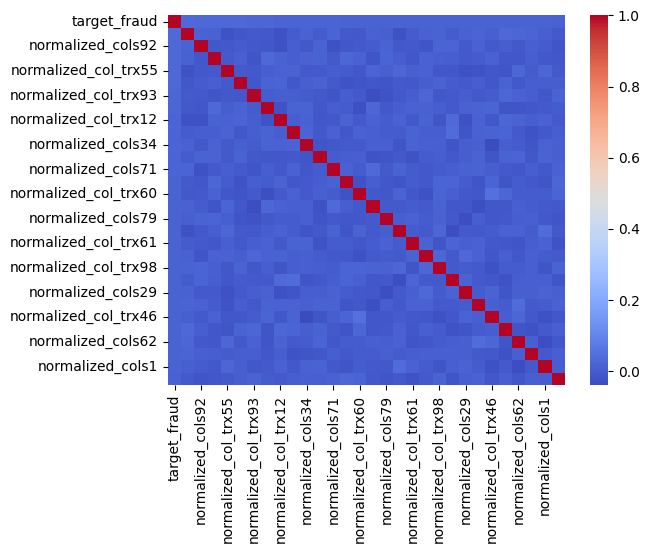

In [19]:
## Correlación entre variables numéricas y target_fraud
corr = df_corr.corr()
corr = corr['target_fraud'].sort_values(ascending=False)
top_corr = corr.index[:30]
sns.heatmap(df[top_corr ].corr(), cmap="coolwarm", annot=False)

Text(0.5, 1.0, 'Correlación de las variables numéricas con Tipo de fraude')

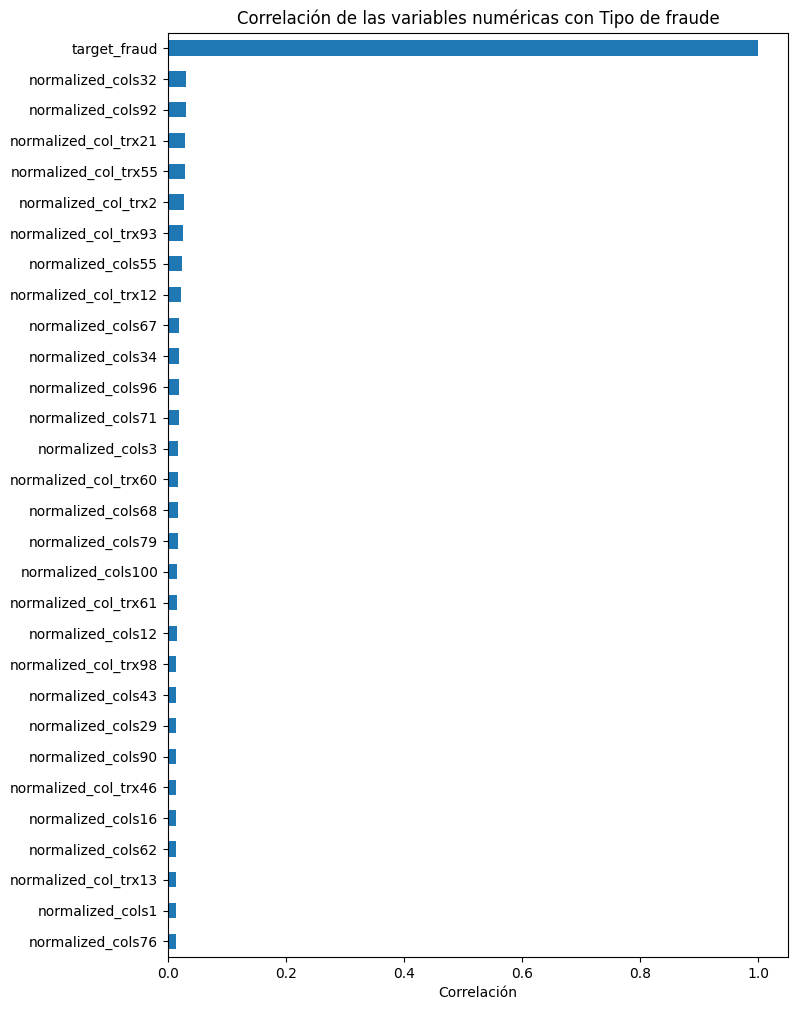

In [20]:
## Grafico de barras de correlación de las variables numéricas con target_fraud
corr[:30].sort_values(ascending=True).plot(kind='barh', figsize=(8,12))
plt.xlabel('Correlación') 
plt.title('Correlación de las variables numéricas con Tipo de fraude')

Text(0.5, 1.0, 'Correlación de las variables numéricas con Tipo de fraude')

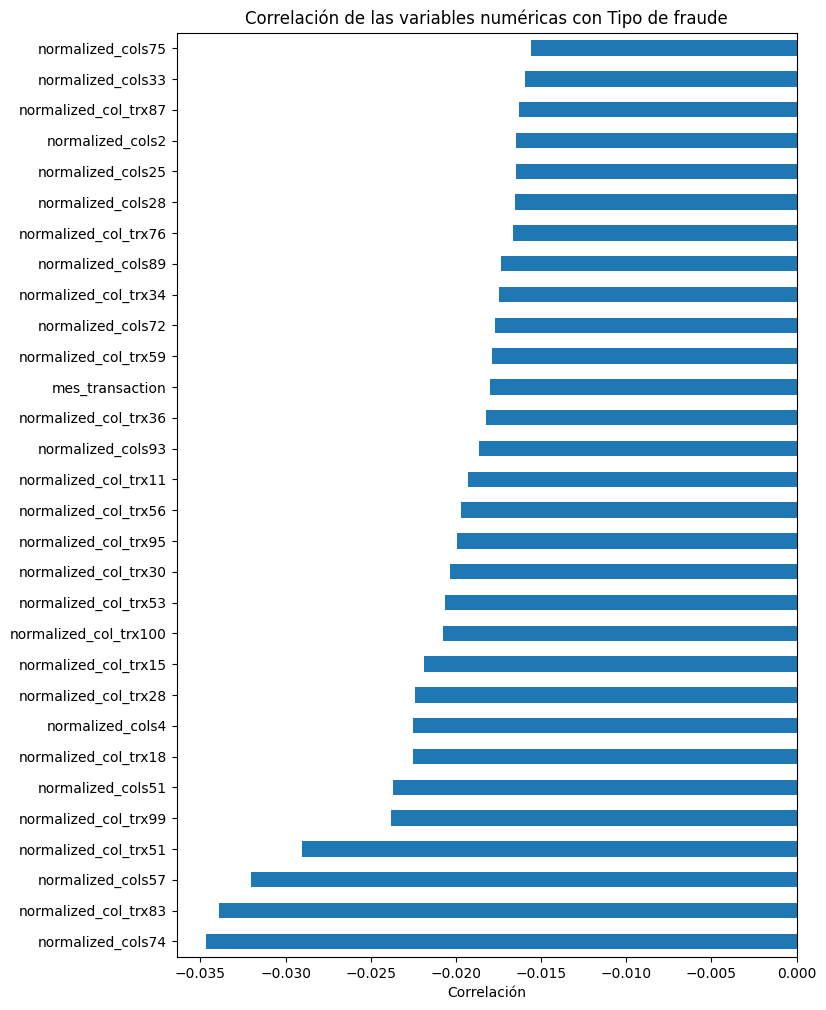

In [21]:
corr.sort_values(ascending=True)[:30].plot(kind='barh', figsize=(8,12))
plt.xlabel('Correlación') 
plt.title('Correlación de las variables numéricas con Tipo de fraude')

Se puede observar que de las variables independientes que más correlación tienen con la variable objetivo ninguna tiene un coeficiente de correlación superior al 0.4, esto indica que hay una relación debil con las variables independientes o no hay relación.

## Desbalance de clases

In [22]:
## Importar librería para balanceo de clases
from imblearn.over_sampling import BorderlineSMOTE

In [23]:
## Selección de varibles independientes y variable objetivo
X = df_corr.drop(columns=['target_fraud'])
y = df_corr['target_fraud']

In [24]:
bsmote = BorderlineSMOTE(sampling_strategy=0.05, kind="borderline-1")
X_sampling, y_sampling = bsmote.fit_resample(X, y)

In [25]:
Counter(y_sampling)

Counter({0: 4950, 1: 247})

In [26]:
## Proporción de clases después del balanceo
y_sampling.value_counts(normalize=True)

target_fraud
0    0.952473
1    0.047527
Name: proportion, dtype: float64

## División de datos

In [27]:
from sklearn.model_selection import train_test_split
## Se toma un 80% para entrenamiento y un 20% para test
X_train, X_test, y_train, y_test = train_test_split(X_sampling, y_sampling, test_size = 0.2, random_state = 42)

X_train.head()

,normalized_cols1,normalized_cols2,normalized_cols3,normalized_cols4,normalized_cols5,normalized_cols6,normalized_cols7,normalized_cols8,normalized_cols9,normalized_cols10,...,normalized_col_trx93,normalized_col_trx94,normalized_col_trx95,normalized_col_trx96,normalized_col_trx97,normalized_col_trx98,normalized_col_trx99,normalized_col_trx100,TransactionValue_PSE,mes_transaction
2004,2.697335,2.487380,3.109197,8.929852,6.397454,1.120704,1.753898,3.702970,1.593227,6.668422,...,0.156477,0.685699,0.118478,0.096805,0.332263,0.998602,0.239484,0.001555,48530.142006,9
3693,4.499642,0.427638,1.832380,1.758730,5.971970,1.069504,7.882991,2.819915,1.443437,2.102851,...,0.272272,0.137315,0.957312,0.979600,0.915193,0.999744,0.909060,0.209519,37676.123763,8
3403,2.470665,2.864272,3.459958,1.585234,1.771196,2.916236,1.016652,3.667033,7.526194,6.048566,...,0.565639,0.004568,0.153732,0.717230,0.010838,0.566204,0.980467,0.199509,48102.150795,2
3632,5.541912,3.505631,5.999991,1.663928,8.193023,1.893012,2.240425,2.313229,1.203977,1.677227,...,0.366815,0.991894,0.079278,0.922852,0.029691,0.376050,0.067071,0.349279,33447.687039,2
283,1.815109,2.033181,1.212917,2.286254,1.650168,6.129091,2.278908,4.152661,1.640938,4.200889,...,0.091812,0.773889,0.000028,0.152805,0.172084,0.229312,0.472481,0.072556,35006.553156,11


Se seleccionan las características (variables) más relevantes del conjunto de datos para usarlas en la construcción del modelo de Machine Learning, desechando el resto.

In [28]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 20 se decide implícitamente eliminar el resto de caracteristicas
selection_model = SelectKBest(f_classif, k = 20)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,normalized_cols1,normalized_cols29,normalized_cols34,normalized_cols66,normalized_cols70,normalized_cols78,normalized_cols90,normalized_cols92,normalized_cols93,normalized_col_trx8,normalized_col_trx16,normalized_col_trx23,normalized_col_trx24,normalized_col_trx45,normalized_col_trx48,normalized_col_trx80,normalized_col_trx96,normalized_col_trx99,TransactionValue_PSE,mes_transaction
0,2.697335,3.485927,2.681832,5.489753,0.590481,2.414382,2.512181,1.033163,3.681808,0.007818,6.385966e-07,0.321464,0.563799,0.138349,0.555608,0.961717,0.096805,0.239484,48530.142006,9.0
1,4.499642,3.286116,2.145816,3.767366,4.112223,1.070091,11.857882,3.458029,2.799455,0.790312,9.996461e-01,0.671108,0.996007,0.705287,0.785281,0.878745,0.979600,0.909060,37676.123763,8.0
2,2.470665,1.541981,2.762571,2.861856,2.203886,4.906784,7.117780,4.055303,1.349186,0.091786,1.697495e-01,0.018841,0.253123,0.639259,0.073436,0.003346,0.717230,0.980467,48102.150795,2.0
3,5.541912,8.923883,3.174778,2.065720,2.749890,0.559252,4.703881,2.544894,3.874717,0.681140,4.686387e-01,0.979242,0.004487,0.982962,0.072126,0.350168,0.922852,0.067071,33447.687039,2.0
4,1.815109,7.540637,2.977195,3.863974,6.843189,7.404063,11.960572,5.757754,3.236795,0.137314,3.491568e-01,0.036455,0.220100,0.098335,0.215328,0.853066,0.152805,0.472481,35006.553156,11.0


# Modelado

En este apartado se construye un modelo que tenga la capacidad de predecir de predecir comportamientos fraudulentos en la aplicación.

## Benchmark

En este apartado se utilizan una serie de modelos con el fin de ver el comportamiento de modelos sencillos, esto para crear una línea base que permita hacer luego soluciones más complejas.

In [29]:
# Importar librerías a emplear
from sklearn.metrics import f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Se ponen los modelos en un diccionario
modelos = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Xgoost": XGBClassifier(),
          "Lightgbm": LGBMClassifier(),
          "Naive bayes": GaussianNB()}

# Funciòn fit and score models
def fit_y_resultados(modelos, X_train, X_test, y_train, y_test):

    resultado_modelos = {}
    
    for nombre, model in modelos.items():
      
        model.fit(X_train, y_train)
     
        # Predicciones
        y_pred = model.predict(X_test)
        
        # Métricas
        resultado_modelos[nombre] = {
            "F1-Score": f1_score(y_test, y_pred, average="binary"),
            "Recall": recall_score(y_test, y_pred, average="binary")
        }
    return resultado_modelos

In [31]:
## Resultados iniciales de modelos

resultado_modelos = fit_y_resultados(modelos=modelos,
                             X_train=X_train_sel,
                             X_test=X_test_sel,
                             y_train=y_train,
                             y_test=y_test)
resultado_modelos

[LightGBM] [Info] Number of positive: 194, number of negative: 3963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4858
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046668 -> initscore=-3.016898
[LightGBM] [Info] Start training from score -3.016898


{'KNN': {'F1-Score': 0.5168539325842697, 'Recall': 0.4339622641509434},
 'Logistic Regression': {'F1-Score': 0.3013698630136986,
  'Recall': 0.20754716981132076},
 'Random Forest': {'F1-Score': 0.8478260869565217,
  'Recall': 0.7358490566037735},
 'Xgoost': {'F1-Score': 0.8602150537634409, 'Recall': 0.7547169811320755},
 'Lightgbm': {'F1-Score': 0.8602150537634409, 'Recall': 0.7547169811320755},
 'Naive bayes': {'F1-Score': 0.5714285714285714,
  'Recall': 0.49056603773584906}}

Con los modelos básicos entrenados se inicia la optimización de hiper parámetros para mejorar los resultados. Se selecciona el modelo Lightgbm, aunque los resultados son iguales que el Xgoost, es un modelo que genera menor costo computacional.

In [32]:
## Importar librerías para optimización de hiperparámetros
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

In [33]:
## Se e,plea la metrica F1 para la optimización, dado el desbalance de clases
f1_scorer = make_scorer(f1_score, average="binary")

parametros_lgbm = {
    "num_leaves": Integer(20, 200),
    "max_depth": Integer(2, 20),  
    "learning_rate": Real(0.001, 0.3, prior="log-uniform"),
    "n_estimators": Integer(100, 500),
    "reg_alpha": Real(1e-8, 10.0, prior="log-uniform"),
    "reg_lambda": Real(1e-8, 10.0, prior="log-uniform"),
    "boosting_type": Categorical(["gbdt", "dart", "rf"]),
    "subsample": Real(0.5, 0.9),      
    "subsample_freq": Integer(1, 5), 
}

lgbm = BayesSearchCV(
    estimator=LGBMClassifier(random_state=42, class_weight="balanced"),
    search_spaces=parametros_lgbm,
    n_iter=50,  
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenar
lgbm.fit(X_train_sel, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

,estimator,LGBMClassifie...ndom_state=42)
,search_spaces,"{'boosting_type': Categorical(c...), prior=None), 'learning_rate': Real(low=0.00...m='normalize'), 'max_depth': Integer(low=2...m='normalize'), 'n_estimators': Integer(low=1...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,50
,scoring,make_scorer(f...verage=binary)
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [35]:
## Mejores parámetros encontrados
lgbm.best_params_

OrderedDict([('boosting_type', 'dart'),
             ('learning_rate', 0.13220143627057035),
             ('max_depth', 16),
             ('n_estimators', 305),
             ('num_leaves', 183),
             ('reg_alpha', 1e-08),
             ('reg_lambda', 2.084719340260522e-06),
             ('subsample', 0.5),
             ('subsample_freq', 5)])

In [36]:
## Modelo final con los mejores parámetros encontrados
lgbm_final = LGBMClassifier(**lgbm.best_params_, random_state=42, class_weight="balanced")
lgbm_final.fit(X_train_sel, y_train)

[LightGBM] [Info] Number of positive: 194, number of negative: 3963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4858
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,boosting_type,'dart'
,num_leaves,183
,max_depth,16
,learning_rate,0.13220143627057035
,n_estimators,305
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [37]:
# Se hacen las predicciones con el modelo optimizado
y_preds = lgbm_final.predict(X_test_sel)

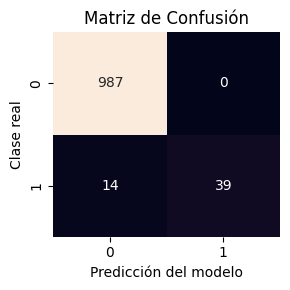

In [38]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

# Agregar títulos a los ejes
plt.xlabel("Predicción del modelo")
plt.ylabel("Clase real")
plt.title("Matriz de Confusión")

plt.tight_layout()

plt.tight_layout()

plt.show()

* Verdaderos negativos (TN, False negative): Se corresponde con el número 987 y son los casos en los que el modelo predijo negativo (no fraude) y la clase real también es negativa (no fraude).

* Verdaderos positivos (TP, True positive): Se corresponde con el número 39 y son los casos en los que el modelo predijo positivo (fraude) y la clase real también es positiva (fraude).

* Falsos positivos (FP, False positive): Se corresponde con el número 0 y son los casos en los que el modelo predijo positivo (fraude) y la clase real es negativa (no fraude).

* Falsos negativos (FN, False negative): Se corresponde con el número 14 y son los casos en los que el modelo predijo negativo(no fraude) y la clase real es positiva (fraude).

In [39]:
# Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       987
           1       1.00      0.74      0.85        53

    accuracy                           0.99      1040
   macro avg       0.99      0.87      0.92      1040
weighted avg       0.99      0.99      0.99      1040



In [40]:
### Metrícas de entrenamiento para validar que no hay overfitting
# Se hacen las predicciones con el modelo optimizado
y_preds_train = lgbm_final.predict(X_train_sel)

print(classification_report(y_train, y_preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3963
           1       1.00      0.99      1.00       194

    accuracy                           1.00      4157
   macro avg       1.00      1.00      1.00      4157
weighted avg       1.00      1.00      1.00      4157



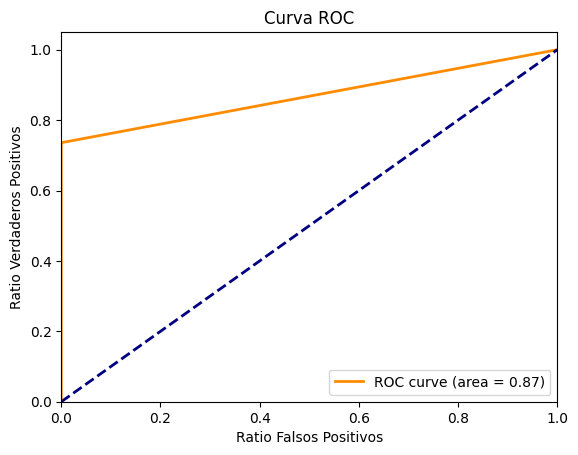

In [41]:
# Importar curva ROC
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Interpretabilidad del modelo

In [42]:
## Importar interpretación con shap
import shap
explainer = shap.TreeExplainer(lgbm_final)
shap_values = explainer.shap_values(X_test_sel)

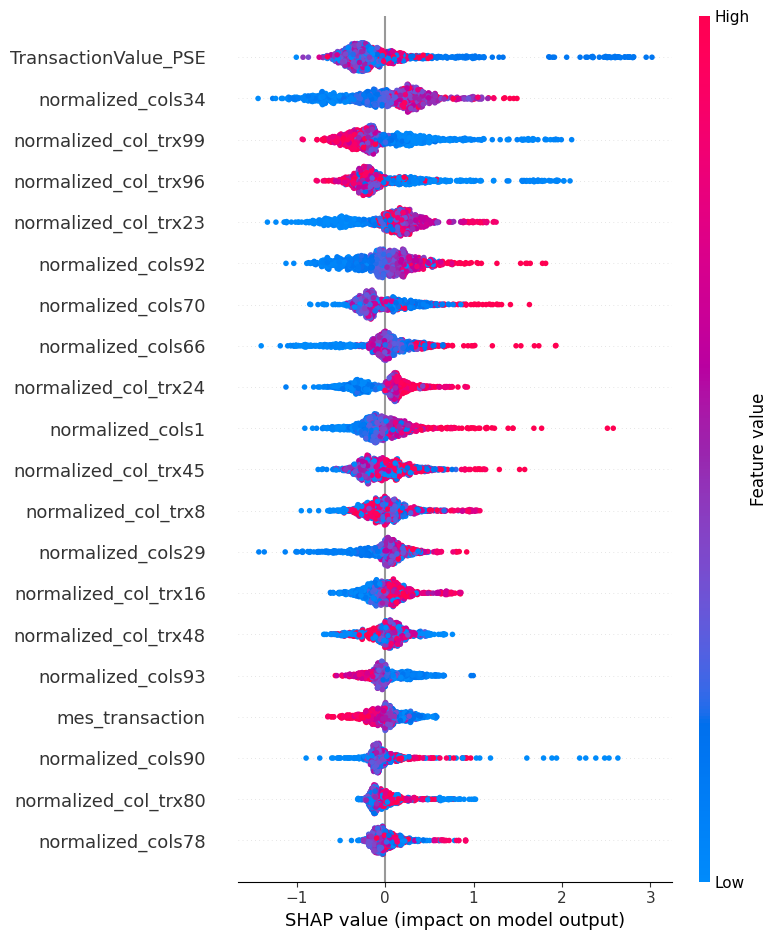

In [43]:
shap.summary_plot(shap_values, X_test_sel)

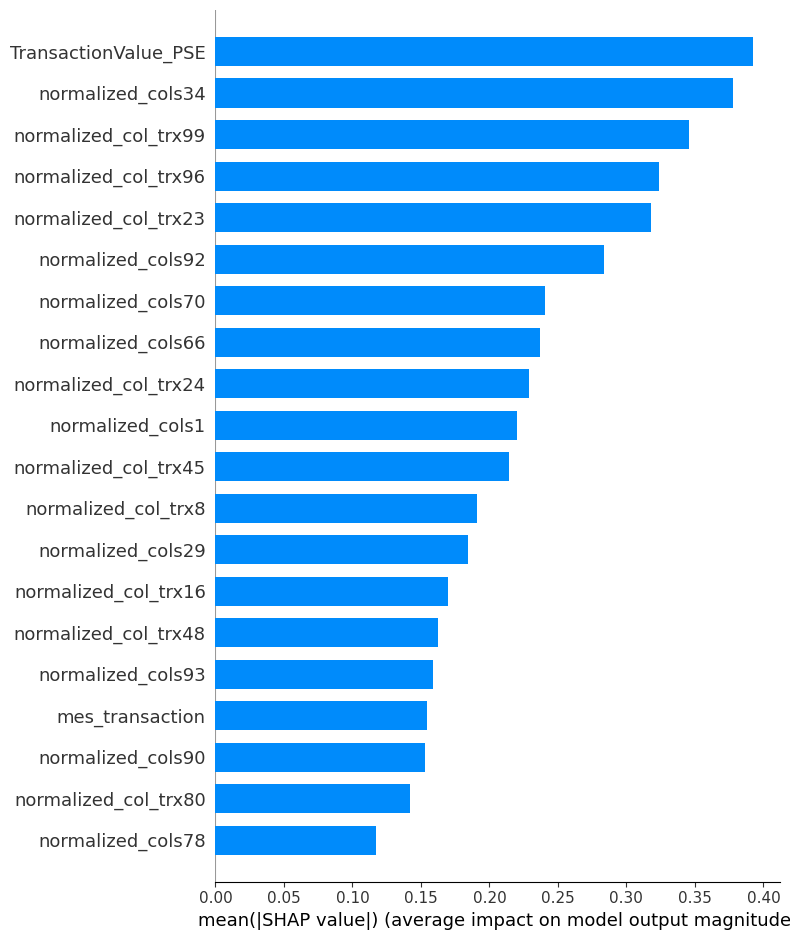

In [45]:
shap.summary_plot(shap_values, X_test_sel, plot_type="bar")